<a href="https://colab.research.google.com/github/arfandiTelU/Skripsi/blob/master/Cnn_Klasifikasi_Bibit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menghubungkan Dengan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Install Library

In [5]:
!pip install -q keras
!pip install opencv-contrib-python

Import Library

In [0]:
import cv2
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def transform(pos):
# This function is used to find the corners of the object and the dimensions of the object
    pts=[]
    n=len(pos)
    for i in range(n):
        pts.append(list(pos[i][0]))
       
    sums={}
    diffs={}
    tl=tr=bl=br=0
    for i in pts:
        x=i[0]
        y=i[1]
        sum=x+y
        diff=y-x
        sums[sum]=i
        diffs[diff]=i
    sums=sorted(sums.items())
    diffs=sorted(diffs.items())
    n=len(sums)
    rect=[sums[0][1],diffs[0][1],diffs[n-1][1],sums[n-1][1]]
    #      top-left   top-right   bottom-left   bottom-right
   
    h1=np.sqrt((rect[0][0]-rect[2][0])**2 + (rect[0][1]-rect[2][1])**2)     #height of left side
    h2=np.sqrt((rect[1][0]-rect[3][0])**2 + (rect[1][1]-rect[3][1])**2)     #height of right side
    h=max(h1,h2)
   
    w1=np.sqrt((rect[0][0]-rect[1][0])**2 + (rect[0][1]-rect[1][1])**2)     #width of upper side
    w2=np.sqrt((rect[2][0]-rect[3][0])**2 + (rect[2][1]-rect[3][1])**2)     #width of lower side
    w=max(w1,w2)
   
    return int(w),int(h),rect

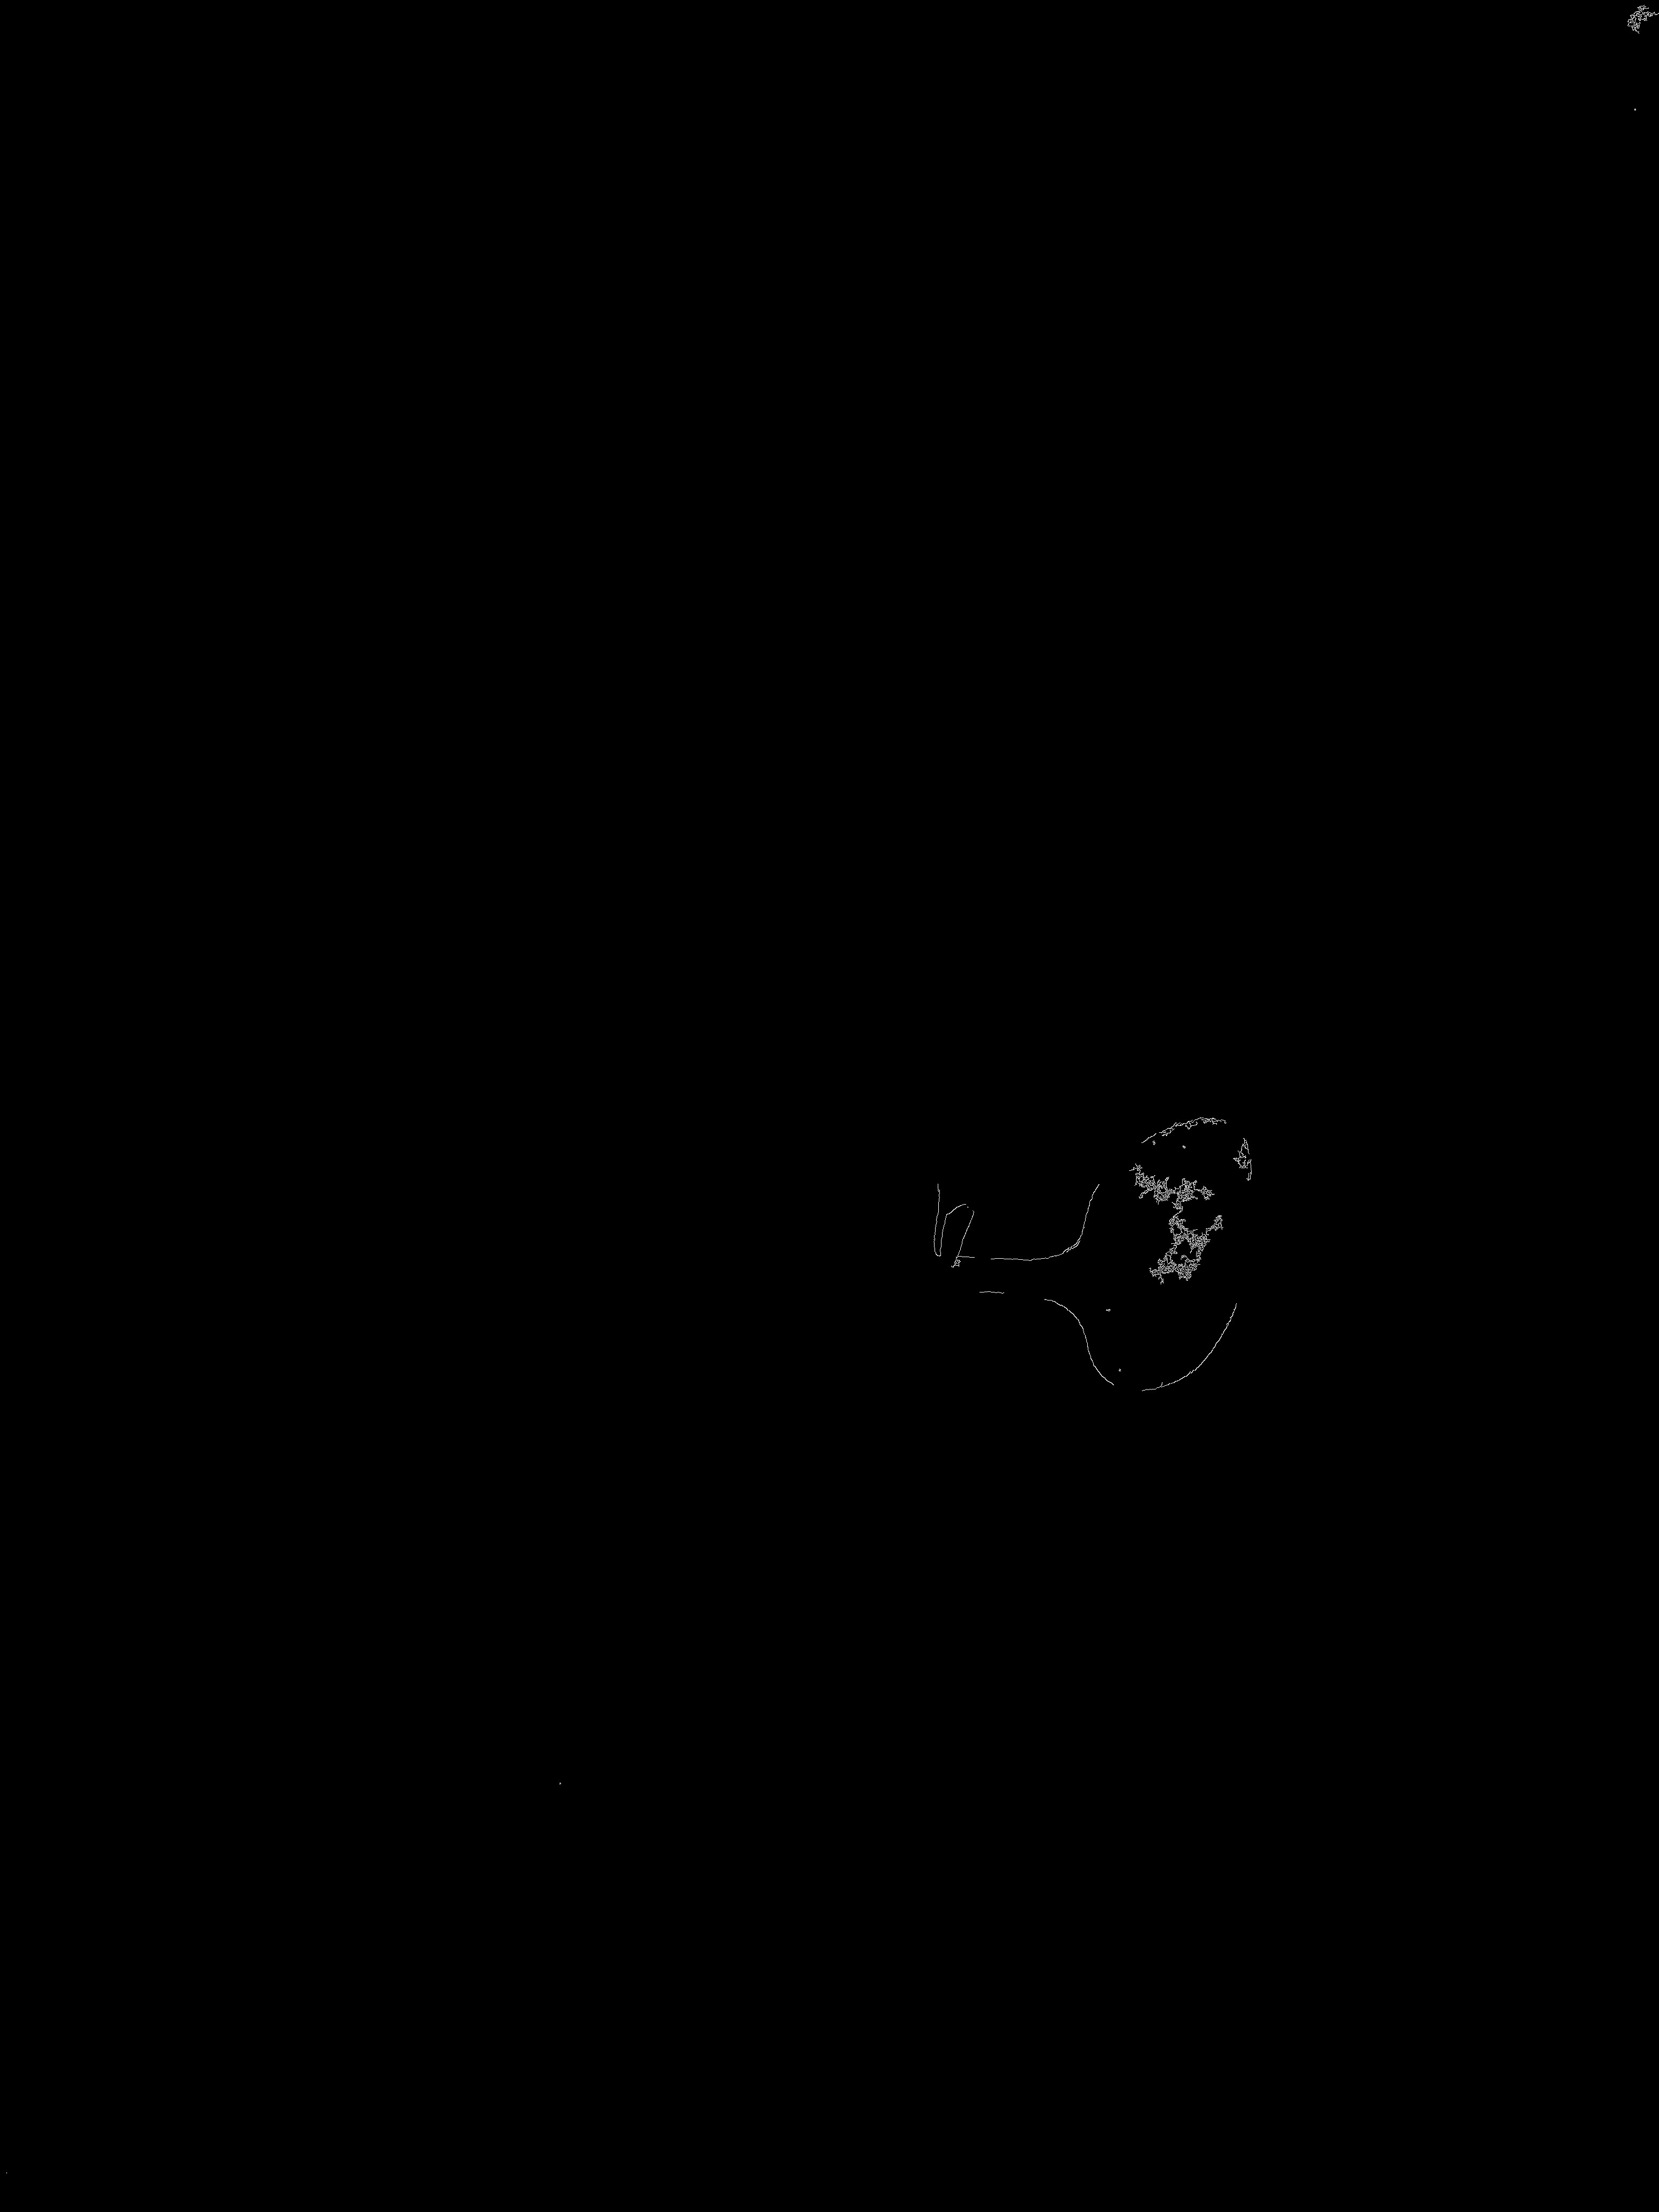

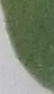

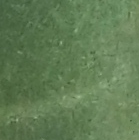

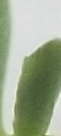

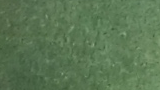

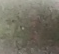

In [88]:
path = '/content/gdrive/My Drive/Dataset/cabai hari ke 10'


#reading image
image = cv2.imread("/content/gdrive/My Drive/Dataset/pakcoy hari ke 5/20191231_132829.jpg")
# print(image)
# cv2_imshow(image)

#converting to gray scale
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#applying canny edge detection
edged = cv2.Canny(image, 10, 250)

cv2_imshow(edged)
#finding contours
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
idx = 0
for c in cnts:
	x,y,w,h = cv2.boundingRect(c)
	if w>50 and h>50:
		idx+=1
		new_img=image[y:y+h,x:x+w]
		#cropping images
		cv2_imshow(new_img)
# https://github.com/imneonizer/Find-and-crop-objects-From-images-using-OpenCV-and-Python/blob/master/crop_objects.py